# Выделение групп пользователей мобильного приложения на основе поведения

## Описание проекта

Нам необходимо сегментировать группы пользователей, которые различаются по метрикам: 

    1. retention rate,
    2. время, проведённое в приложении,
    3. частота действий,
    4. конверсия в целевое действие — просмотр контактов.

И проверить две сатистические гипотезы:

    1. Некоторые пользователи установили приложение по ссылке из yandex, другие — из google . Проверим гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
    2. Пользователи чаще покупают предметы из "избранного" чем из рекомендаций.

### Описание данных

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещаяих на доске объявлений.
В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет mobile_dataset.csv содержит колонки: 

    event.time — время совершения
    event.name — название события
    user.id— идентификатор пользователя
    
Датасет mobile_sources.csv содержит колонки:

    userId — идентификатор пользователя
    source — источник, с которого пользователь установил приложение
    
Расшифровки событий:

    advert_open — открытие карточки объявления
    photos_show — просмотр фотографий в объявлении
    tips_show — пользователь увидел рекомендованные объявления
    tips_click — пользователь кликнул по рекомендованному объявлению
    contacts_show и show_contacts — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
    contacts_call — пользователь позвонил по номеру телефона на карточке объявления
    map — пользователь открыл карту размещенных объявлений
    search_1—search_7 — разные события, связанные с поиском по сайту
    favorites_add — добавление объявления в избранное

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Знакомство-с-данными.-Предобработка." data-toc-modified-id="Знакомство-с-данными.-Предобработка.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Знакомство с данными. Предобработка.</a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дубликаты</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-событий-и-поиск-возможных-воронок" data-toc-modified-id="Анализ-событий-и-поиск-возможных-воронок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ событий и поиск возможных воронок</a></span></li><li><span><a href="#Выделение-сессий" data-toc-modified-id="Выделение-сессий-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выделение сессий</a></span></li><li><span><a href="#Дальнейший-анализ-событий" data-toc-modified-id="Дальнейший-анализ-событий-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дальнейший анализ событий</a></span></li><li><span><a href="#Длительность-сессий" data-toc-modified-id="Длительность-сессий-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Длительность сессий</a></span></li><li><span><a href="#Частота-действий" data-toc-modified-id="Частота-действий-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Частота действий</a></span></li></ul></li><li><span><a href="#Удержание-и-конверсия" data-toc-modified-id="Удержание-и-конверсия-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Удержание и конверсия</a></span><ul class="toc-item"><li><span><a href="#Функции-рассчета-и-визуализации" data-toc-modified-id="Функции-рассчета-и-визуализации-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функции рассчета и визуализации</a></span></li><li><span><a href="#Рассчет-конверсии-и-удержания" data-toc-modified-id="Рассчет-конверсии-и-удержания-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Рассчет конверсии и удержания</a></span><ul class="toc-item"><li><span><a href="#Сегментация-по-частоте" data-toc-modified-id="Сегментация-по-частоте-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Сегментация по частоте</a></span></li><li><span><a href="#Сегментация-по-времени" data-toc-modified-id="Сегментация-по-времени-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Сегментация по времени</a></span></li><li><span><a href="#Сегментация-по-пути" data-toc-modified-id="Сегментация-по-пути-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Сегментация по пути</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Статистический-анализ" data-toc-modified-id="Статистический-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Статистический анализ</a></span><ul class="toc-item"><li><span><a href="#Проверка-гипотезы-разных-конверсий-в-зависимости-от-источника-пользователя" data-toc-modified-id="Проверка-гипотезы-разных-конверсий-в-зависимости-от-источника-пользователя-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка гипотезы разных конверсий в зависимости от источника пользователя</a></span></li><li><span><a href="#Проверка-гипотезы:-пользователи-чаще-покупают-предметы-из-&quot;избранного&quot;-чем-из-рекомендаций" data-toc-modified-id="Проверка-гипотезы:-пользователи-чаще-покупают-предметы-из-&quot;избранного&quot;-чем-из-рекомендаций-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка гипотезы: пользователи чаще покупают предметы из "избранного" чем из рекомендаций</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Презентация" data-toc-modified-id="Презентация-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Презентация</a></span></li></ul></li></ul></div>

## Импорт библиотек

Импортируем все необходимые библиотеки

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Знакомство с данными. Предобработка.

Ознакомимся с данными событий

In [2]:
try:
    events = pd.read_csv('mobile_dataset.csv')
except:
    events = pd.read_csv('/datasets/mobile_dataset.csv')
events.info()
events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


Сразу же поменяем названия столбцов на более удобные и приведем столбец времени к datetime

In [3]:
events.columns = ['event_time', 'event_name', 'user_id']

In [4]:
events['event_time'] = pd.to_datetime(events['event_time'], format='%Y-%m-%d %H:%M:%S.%f')
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


Ознакомимся с таблицей рекламных источников:

In [5]:
try:
    source = pd.read_csv('mobile_sourсes.csv')
except:
    source = pd.read_csv('/datasets/mobile_sourсes.csv')
source.info()
source.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


Поменяем названия столбцов

In [6]:
source.columns = ['user_id', 'source']

Как мы видим пропусков в данных нет

### Дубликаты

Проверим данные на явные дубликаты:

In [7]:
events.duplicated().sum()

0

In [8]:
source.duplicated().sum()

0

Явных дубликатов не обнаружено. Посмотрим, как выглядят текстовые данные -- возможно в них закрались неявные дубликаты?

In [9]:
events['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

В названиях событий много схожих: `contacts_show` и `show_contacts`, несколько по-разному пронумерованных `search`. Однако мы не можем попросту избавиться от них -- это разные события исходящие из разных сценариев, хоть их названия и не поясняют отличия. Далее мы попробуем разобраться в этих различиях.

In [10]:
source['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

В названиях источников неявных дубликатов нет

## Исследовательский анализ данных

### Анализ событий и поиск возможных воронок

Первым делом нам нужно попытаться разобраться с событиями: какие что значат, какие за какими следуют, вообще попытаться найти возможные воронки.

Выстроим по количеству происшествий все события, а так же события пользователей, совершивших целевое действие -- просмотр контактов.

In [11]:
event_stat = pd.DataFrame()
event_stat['total'] = events['event_name'].value_counts()
users_called = (events.query('event_name in ["contacts_show", "show_contacts"]')['user_id']
                .drop_duplicates().reset_index(drop=True)) #список id пользователей посмотревших контакты
event_stat['called'] = events.query('user_id in @users_called')['event_name'].value_counts()
event_stat

,total,called
tips_show,40055,12768
photos_show,10012,3828
advert_open,6164,1589
contacts_show,4450,4450
map,3881,1101
search_1,3506,1341
favorites_add,1417,424
search_5,1049,249
tips_click,814,333
search_4,701,149


Выстроить явную воронку пока сложно. Однако можно сделать несколько выводов:

    - Рекомендованные объявления видят чаще всего из всех событий. Возможно их показывают прямо на главном экране;
    - Фото объявления можно посмотреть не открывая его само;
    - Самый популярный их поисков -- `search_1`. Возможно это основной поиск;
    - Пользователи достаточно редко кликают по рекомендованным объявлениям.
    
Для более подробного исследования событий
    
    1) Разделим события на сессии
    2) Напишем функцию, которая покажет нам, как именно происходят события

### Выделение сессий

Разделим события на сессии. Сессией будет считаться группа событий одного пользователя, в которой каждые соседния события отличаются друг от друга не более чем на полчаса:

In [12]:
events['diff'] = events.groupby('user_id')['event_time'].diff(1)
session_start = events[(events['diff'].isnull()) | (events['diff'] > '1800 seconds')]
session_start['session'] = session_start.index
session_start = (session_start[['event_time', 'user_id', 'session']]
                 .rename(columns={'event_time': 'session_start'}))
events = pd.merge_asof(events, session_start[['user_id', 'session']],
                       by='user_id', left_index=True, right_index=True)
events.head()

<ipython-input-12-95de04c10f13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_start['session'] = session_start.index


,event_time,event_name,user_id,diff,session
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,NaT,0
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,0 days 00:00:00.804963,0
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,NaT,2
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,0 days 00:00:05.803014,0
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,0 days 00:00:54.074472,2


Теперь каждой сессии присвоен уникальный номер. Номер при этом не обязательно отражает последовательность сессий во времени, но нам это и не необходимо.

### Дальнейший анализ событий

Напишем функцию, которая будет описывать каждый тип события. Она покажет нам:

    - С каким количеством пользователей и долей пользователей произошло это событие
    - Как часто происходят другие события вместе с данным событием

In [13]:
def describe_event(event, df, show_sessions=False):
    all_users = df['user_id'].unique()
    event_users = df.query('event_name == @event')['user_id'].unique()
    if show_sessions:
        for session in df.query('event_name == @event')['session'].unique()[:10]:
            display(df.query('session == @session'))
    return [event, len(event_users), len(event_users)/len(all_users)]

Рассмотрим события по количеству пользователей, совершивших их:

In [14]:
all_events_stat = []
for event in events['event_name'].unique():
    all_events_stat.append(describe_event(event, events))
all_events_stat = pd.DataFrame(all_events_stat, 
                               columns = ['event_name', 'event_users', 'event_users_share'])
pd.merge(all_events_stat,
         pd.DataFrame(events['event_name'].value_counts().reset_index()
             .rename(columns={'index': 'event_name', 'event_name': 'event_count'})),
         on='event_name').sort_values(by='event_users', ascending=False)

,event_name,event_users,event_users_share,event_count
1,tips_show,2801,0.652457,40055
2,map,1456,0.339157,3881
7,photos_show,1095,0.255066,10012
3,contacts_show,979,0.228046,4450
8,search_1,787,0.183322,3506
0,advert_open,751,0.174936,6164
5,search_5,663,0.154437,1049
4,search_4,474,0.110412,701
11,favorites_add,351,0.081761,1417
13,search_6,330,0.076869,460


In [15]:
search_events = ['search_1',
                'search_2',
                'search_3',
                'search_4',        #считаем количество клиентов которые пользовались хотя бы одним поиском
                'search_5',
                'search_6',
                'search_7']
events.query('event_name in @search_events')["user_id"].nunique()

1666

В таком виде "воронка" несколько меняется: например 10000 просмотров фотографий были сделаны всего 1000 пользователей, и больше людей смотрели на карту. В целом у нас в логе совсем нет обязательных событий, действий которые совершил бы каждый пользователь. Посмотрим на попарные корреляции событий в одной сессии:

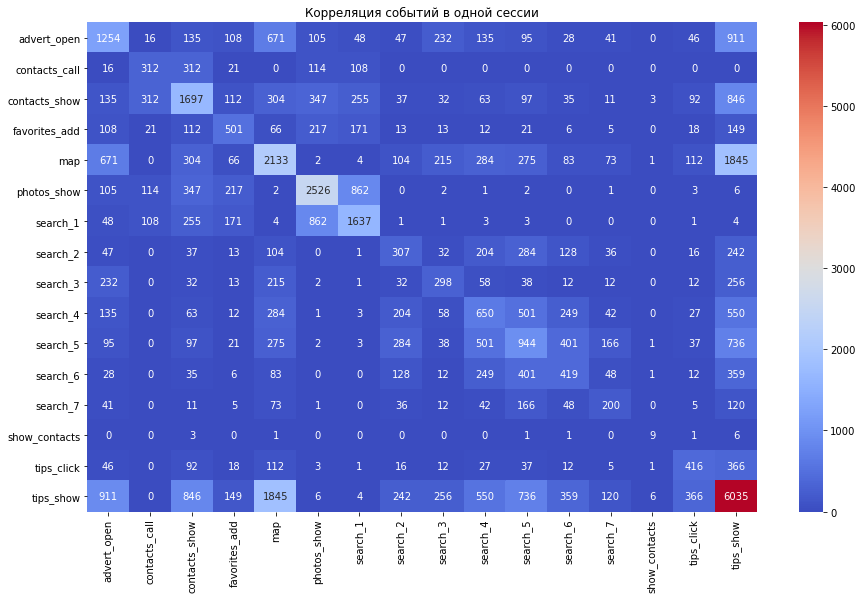

In [16]:
session_events_corr = pd.DataFrame()

for event1 in sorted(events['event_name'].unique()):
    event_sessions = events.query('event_name == @event1')['session'].unique()
    event1_corr = []
    for event2 in sorted(events['event_name'].unique()):
        event1_corr.append(events
                               .query('session in @event_sessions and event_name == @event2')['session']
                               .nunique())
        
    session_events_corr[event1] = pd.Series(event1_corr)
   # fig, ax = plt.subplots(figsize=(10,10))
    #sns.heatmap(pd.DataFrame(event1_corr, index = events['event_name'].unique()), annot=True, ax=ax, fmt='d', cmap= 'coolwarm')
    #ax.set_title(event1)
 
session_events_corr.index = sorted(events['event_name'].unique())


fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(session_events_corr, annot=True, ax=ax, fmt='d', cmap= 'coolwarm');
ax.set_title('Корреляция событий в одной сессии');

Какие выводы мы можем сделать из этих корреляций?

    - показ рекомендованных объявлений и открытие карты практически не происходят в одной сессии с просмотром фото и search_1, но при этом неплохо коррелируют с остальными search-ами;
    - в сессиях с: открытием объявления, открытием карты, search-и со 2 по 6 и нажатием на рекомендации практически всегда происходит показ рекомендаций;
    - непосредственные звонки происходят только в сессиях с contacts_show;
    - show_contacts -- редкое событие, гораздо чаще происходит contacts_show;
    - наше целевое действие примерно одинаково коррелирует со всем остальными(не считая contacts_call);
    - просмотр фото не просиходит при search-ах со 2 по 7;
    - search_2-_7 коррелируют друг с другом в разных комбинациях, при этом практически совсем не коррелируют с search_1;
    
К чему нас все это приводит? Хоть мы и не можем построить четкие воронки, мы видимо что к целевому действию приводят 2 разных пути:

    - через карту+рекомендации+ряд "мелких" поисков
    - через "основной" search_1+просмотр фото
    
Проверим, наблядается ли та же картина не для разных сессий а для разных пользователей?

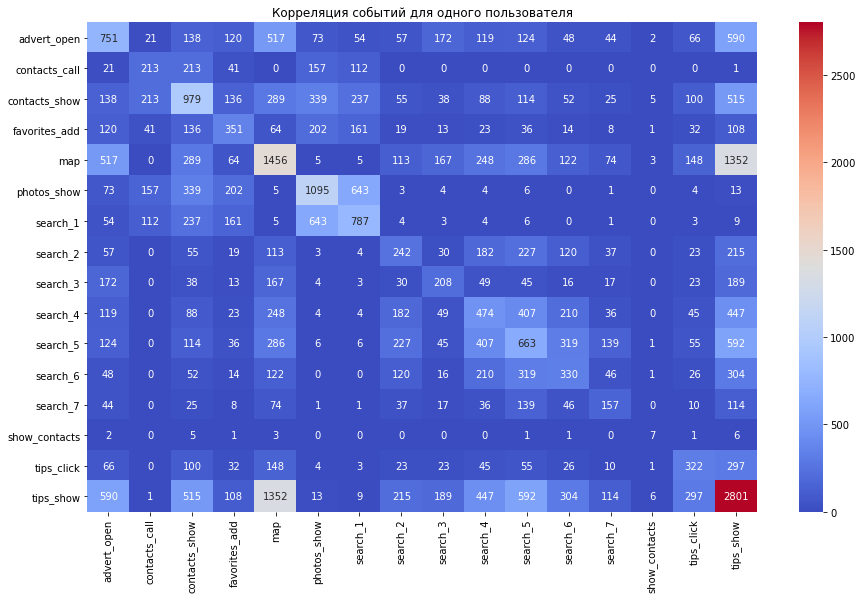

In [17]:
user_events_corr = pd.DataFrame()

for event1 in sorted(events['event_name'].unique()):
    event_users = events.query('event_name == @event1')['user_id'].unique()
    event1_corr = []
    for event2 in sorted(events['event_name'].unique()):
        event1_corr.append(events
                               .query('user_id in @event_users and event_name == @event2')['user_id']
                               .nunique())
        
    user_events_corr[event1] = pd.Series(event1_corr)
   # fig, ax = plt.subplots(figsize=(10,10))
    #sns.heatmap(pd.DataFrame(event1_corr, index = events['event_name'].unique()), annot=True, ax=ax, fmt='d', cmap= 'coolwarm')
    #ax.set_title(event1)
 
user_events_corr.index = sorted(events['event_name'].unique())


fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(user_events_corr, annot=True, ax=ax, fmt='d', cmap= 'coolwarm');
ax.set_title('Корреляция событий для одного пользователя');

Да, картина повторяется! Значит мы можем сделать вывод, что у нас есть две группы пользователей, приходящих к целевому действию разными путями

Разделим пользователей на эти группы:

In [18]:
def behavior(events_session):
    if 'map' in events_session:
        return 'from map'
    elif 'search_1' in events_session or 'photos' in events_session:
        return 'from search'
    #else:      
        #return 'other'
    
    # мы исходим из предположения что клиент на пути к целевому
    # действию либо заходит на карту, либо пользуется поиском


user_type1 = events.groupby(['user_id'])['event_name'].sum().reset_index()
user_type1['behavior'] = user_type1['event_name'].apply(behavior)
events = pd.merge(events, user_type1[['user_id', 'behavior']], on='user_id', how='left')


Мы поняли, как примерно действуют наши пользователи. Можно двигаться дальше

### Длительность сессий

Рассчитаем длительность каждой сессии:

In [19]:
events['diff_sec'] = events['diff'].dt.total_seconds()
time = (events.query('diff_sec < 1800').groupby('session')['diff_sec'].sum() / 60 / 60).reset_index()
time = time.rename(columns={'diff_sec': 'hours'})

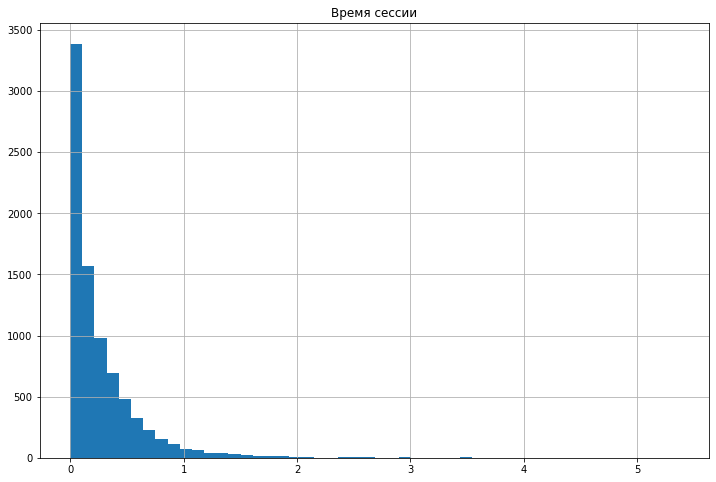

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
time['hours'].hist(bins=50)
ax.set_title('Время сессии');

In [21]:
round(time['hours'], 5).describe()

count    8280.000000
mean        0.268756
std         0.350210
min         0.000000
25%         0.051340
50%         0.153350
75%         0.357907
max         5.366190
Name: hours, dtype: float64

Мы видим, что в основном сессии длятся меньше часа, и даже меньше получаса. Но у нас есть ряд выбросов длиной до 5 часов.
Для каждого пользователя посчитаем общее время в приложении:

count    4210.000000
mean        0.528574
std         1.053763
min         0.000003
25%         0.106905
50%         0.259882
75%         0.562132
max        28.079336
Name: hours, dtype: float64

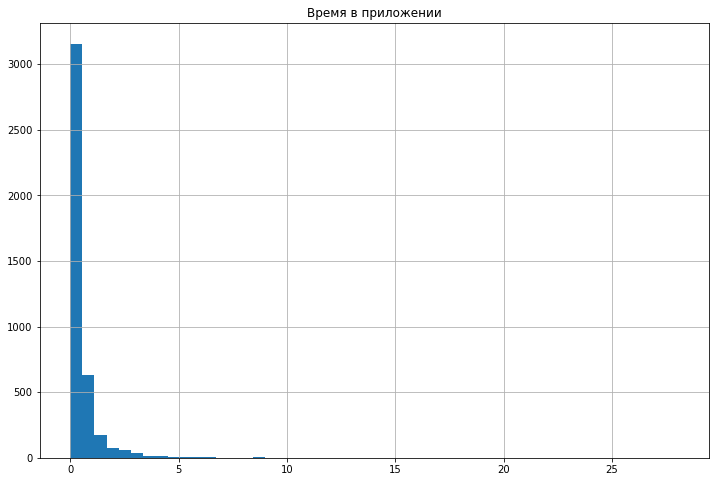

In [22]:
user_time = (pd.merge(time, events[['session', 'user_id']].drop_duplicates(), on='session', how='left')
            .groupby('user_id')['hours'].sum())
fig, ax = plt.subplots(figsize=(12, 8))
user_time.hist(bins=50)
ax.set_title('Время в приложении')
user_time.describe()

In [23]:
events = pd.merge(events, user_time, on='user_id', how='left')
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   event_time  74197 non-null  datetime64[ns] 
 1   event_name  74197 non-null  object         
 2   user_id     74197 non-null  object         
 3   diff        69904 non-null  timedelta64[ns]
 4   session     74197 non-null  int64          
 5   behavior    53855 non-null  object         
 6   diff_sec    69904 non-null  float64        
 7   hours       74068 non-null  float64        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), timedelta64[ns](1)
memory usage: 5.1+ MB


### Частота действий

Посчитаем для каждого пользователя частоту действий -- среднее время между событиями в одной сессии

In [24]:
session_frequency = (events.query('diff_sec < 1800')
                     .groupby(['user_id', 'session'])['diff_sec'].mean().reset_index())
session_frequency = session_frequency.groupby('user_id')['diff_sec'].mean().reset_index()
session_frequency.columns = ['user_id', 'frequency']

In [25]:
events = pd.merge(events, session_frequency, on='user_id', how='left')

count    74068.000000
mean       138.028528
std        100.666655
min          0.012021
25%         71.901280
50%        112.764468
75%        177.613269
max       1260.647820
Name: frequency, dtype: float64

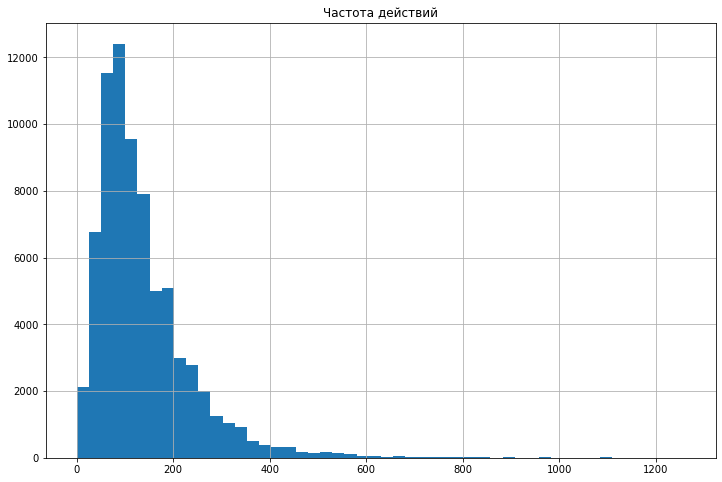

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
events['frequency'].hist(bins=50)
ax.set_title('Частота действий')
events['frequency'].describe()

Пользователей можно поделить быстрых и медленных -- тех у кого пауза между действиями слева от пика и тех у кого справа.

## Удержание и конверсия

### Функции рассчета и визуализации

В этом разделе мы будем хранить все функции, необходимые далее.

In [27]:
# функция для создания пользовательских профилей

def get_profiles(sessions, events, users_called, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg(
            {
                'event_time': 'first',
                'hours': 'first',
                'frequency': 'first',
                'behavior': 'first'
            }
        )
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['called'] = profiles['user_id'].isin(users_called)

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    def groups_by_time(row):
        if row['hours'] < 0.2:
            return 'little'
        else:
            return 'a lot'  
    
    def groups_by_frq(row):
        if row['frequency'] > 110:
            return 'slow'
        else:
            return 'fast'
        
    profiles['time_spent'] = profiles.apply(groups_by_time, axis=1)
    profiles['frequency_rate'] = profiles.apply(groups_by_frq, axis=1)

    return profiles

In [28]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['called'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [29]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    phone_checked,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    


    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        phone_checked.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_time']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [30]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [31]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'called'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('called == True').droplevel('called').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание звонивших пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('called == False').droplevel('called').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание не звонивших пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'called']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('called == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания позвонивших пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('called == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания не звонивших пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [32]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Рассчет конверсии и удержания

Получим профили пользователей

In [33]:
profiles = get_profiles(events.groupby('session').first(), events, users_called, event_names=[])

Посчитаем общее удержание для всех пользователей:

In [34]:
observation_date = datetime(2019, 11, 3).date()

retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles,
    session_start,
    observation_date,
    horizon_days=10,
    dimensions=[],
    ignore_horizon=False,
)

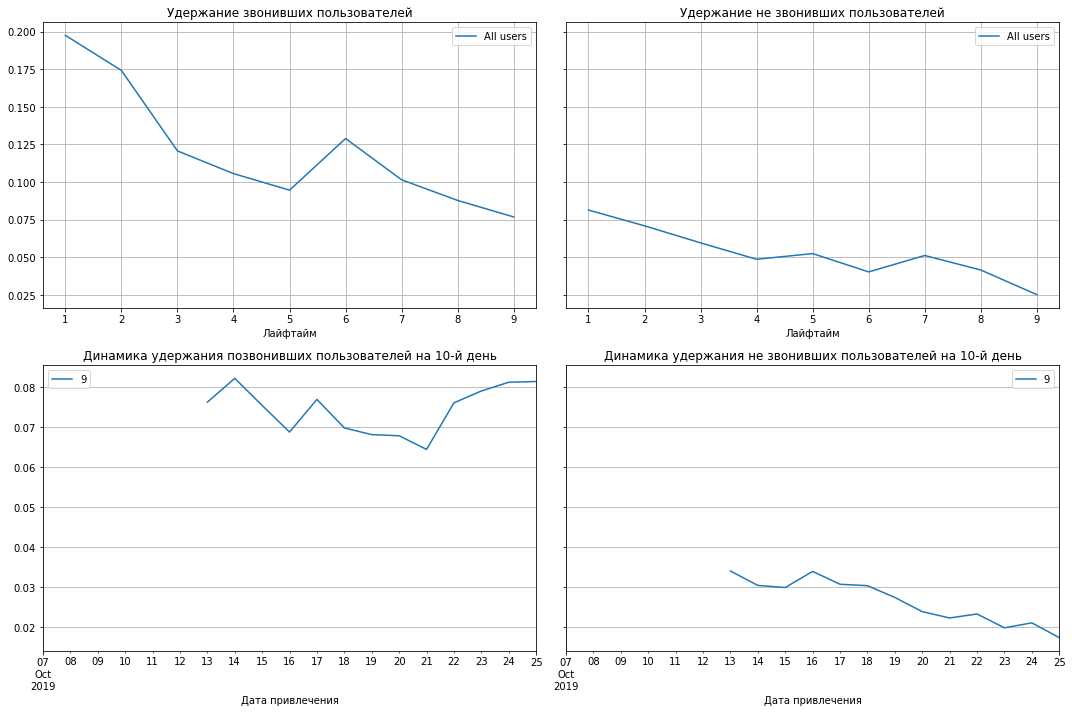

In [35]:
plot_retention(retention_grouped, retention_in_time, horizon=10, window=7)

Удержание показывает реалистичную динамику

In [36]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles,
    events.query('event_name in ["contacts_show", "show_contacts"]'),
    observation_date,
    horizon_days=10,
    dimensions=[],
    ignore_horizon=False,
)

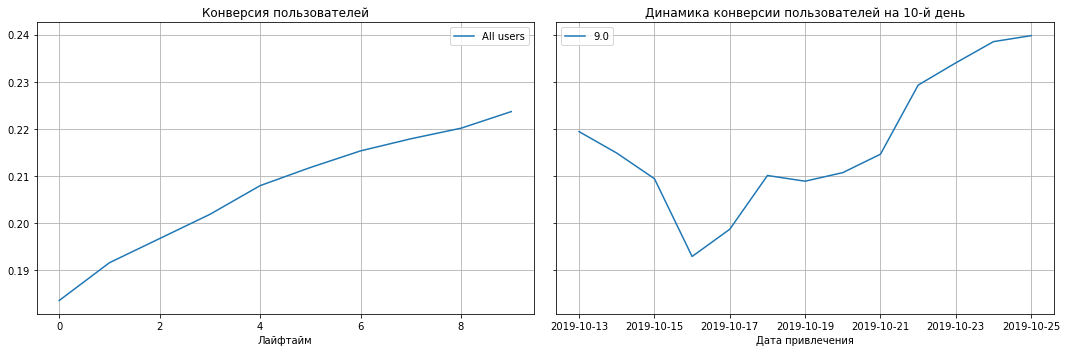

In [37]:
plot_conversion(conversion_grouped, conversion_in_time, horizon=10, window=7)

Конверсия так же показывает реалистичную динамику.

#### Сегментация по частоте

Однако сами по себе кроме этого графики нам ни о чем не говорят. Нужно попробовать разбить пользователей на сегменты и посмотреть разницу графиков по ним. Мы поделили по частоте действий пользователей на быстрых и медленных -- тех у кого пауза между действиями ниже среднего и тех у кого выше. 

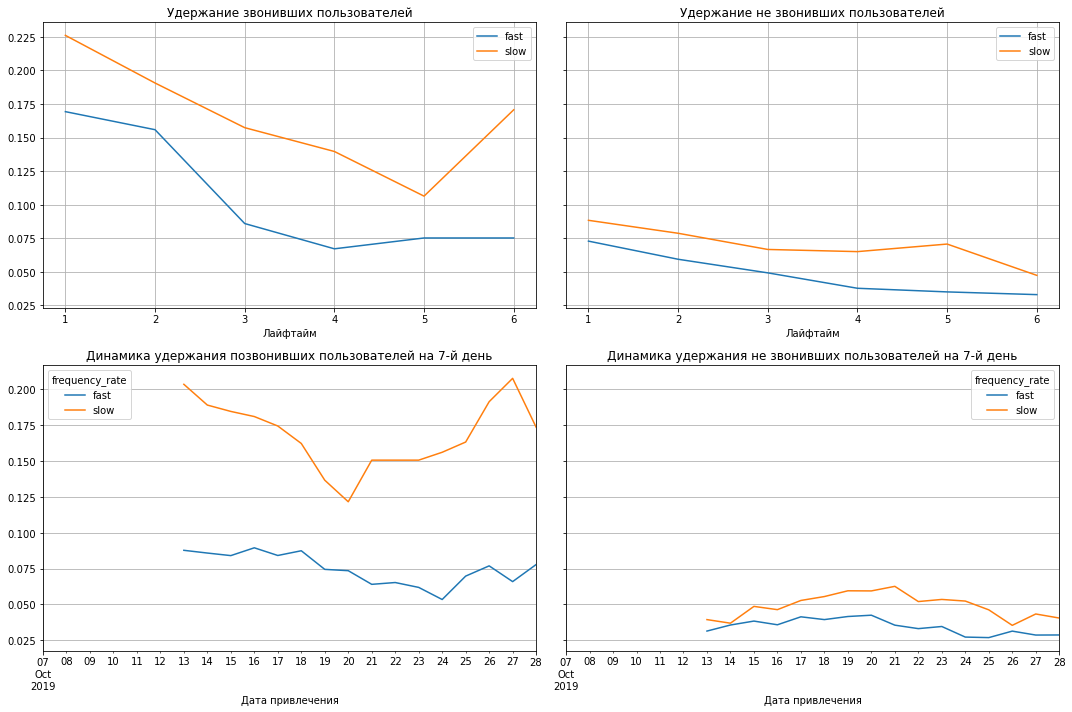

In [38]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles,
    session_start,
    observation_date,
    horizon_days=7,
    dimensions=['frequency_rate'],
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_in_time, horizon=7, window=7)

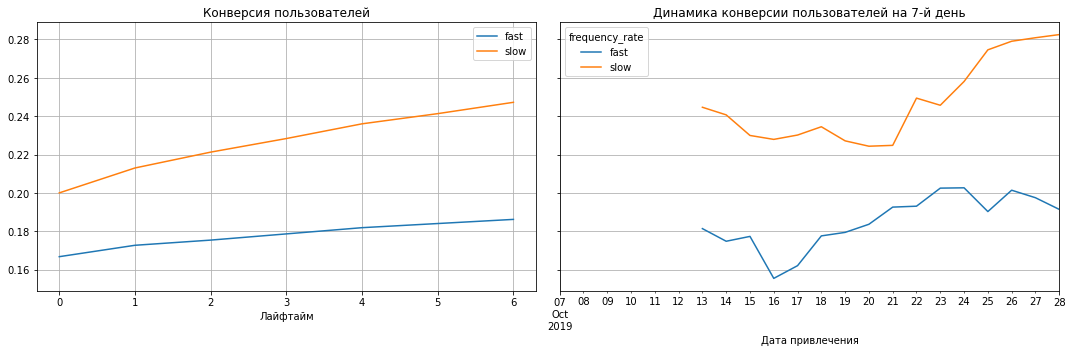

In [39]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles,
    events.query('event_name in ["contacts_show", "show_contacts"]'),
    observation_date,
    horizon_days=7,
    dimensions=['frequency_rate'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_in_time, horizon=7, window=7)

С частотой событий отмечается такая динамика: более медленные пользователи больше остаются в приложении и чаще совершают целевое действие.

#### Сегментация по времени

Пользователей по времени проведенном в приложении мы поделили на большой пик у нуля и остальных, а точнее -- тех кто проводит в приложении меньше и больше 12 минут

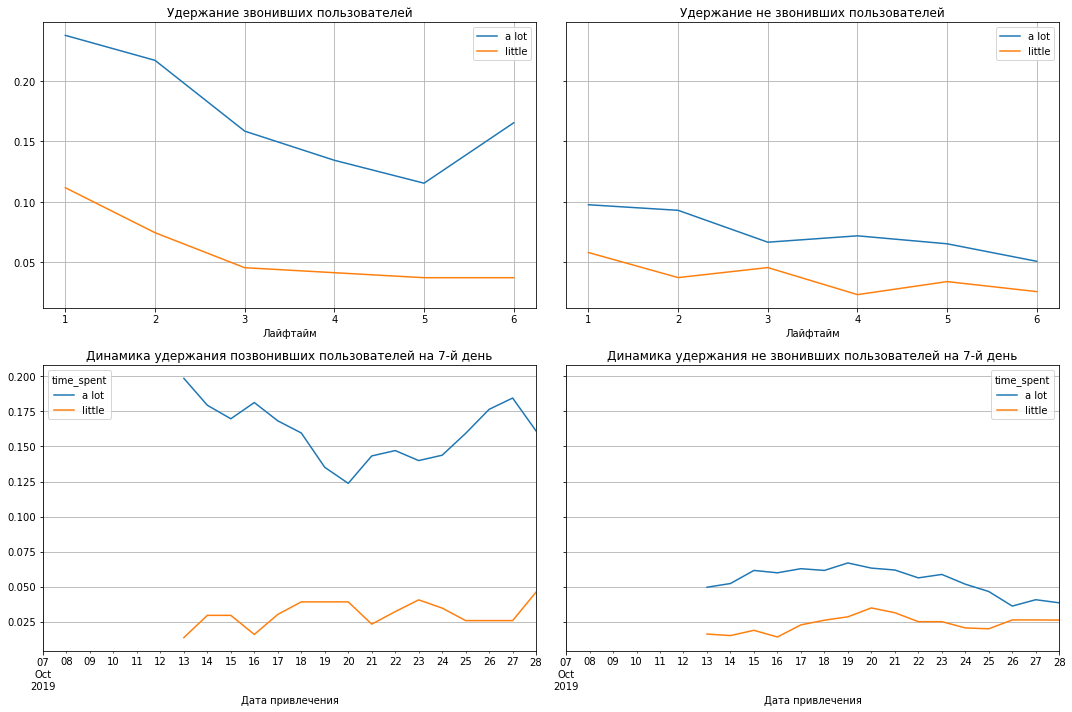

In [40]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles,
    session_start,
    observation_date,
    horizon_days=7,
    dimensions=['time_spent'],
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_in_time, horizon=7, window=7)

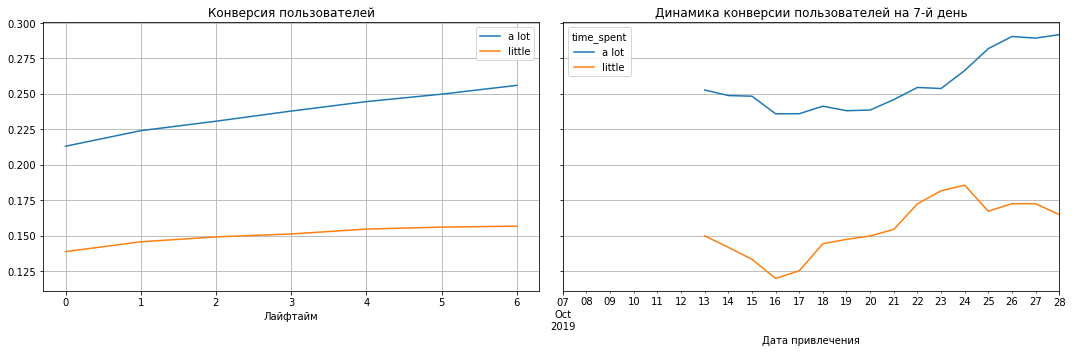

In [41]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles,
    events.query('event_name in ["contacts_show", "show_contacts"]'),
    observation_date,
    horizon_days=7,
    dimensions=['time_spent'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_in_time, horizon=7, window=7)

Пользователи использующие приложение дольше среднего и остаются в нем на дольше, и скорее совершат целевое действие.

#### Сегментация по пути

Теперь посмотрим на наши поведенческие сегменты:

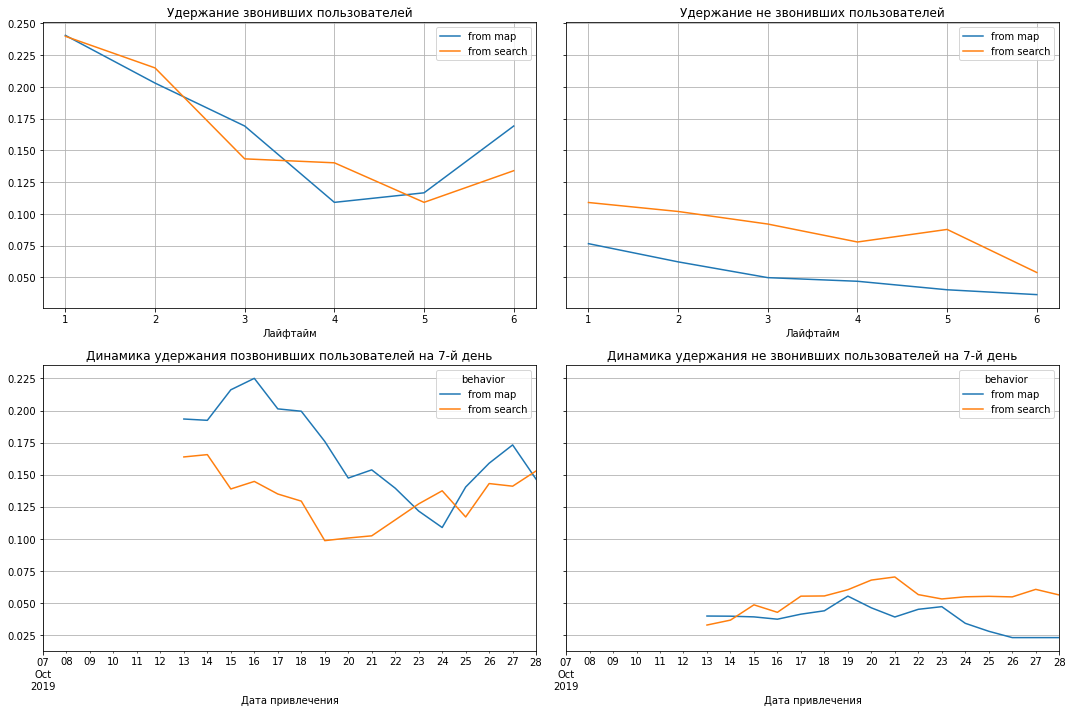

In [42]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles,
    session_start,
    observation_date,
    horizon_days=7,
    dimensions=['behavior'],
    ignore_horizon=False,
)

plot_retention(retention_grouped, retention_in_time, horizon=7, window=7)

Удержание пользователей, не совершивших целевое действие, но пользующихся основным поиском -- выше.

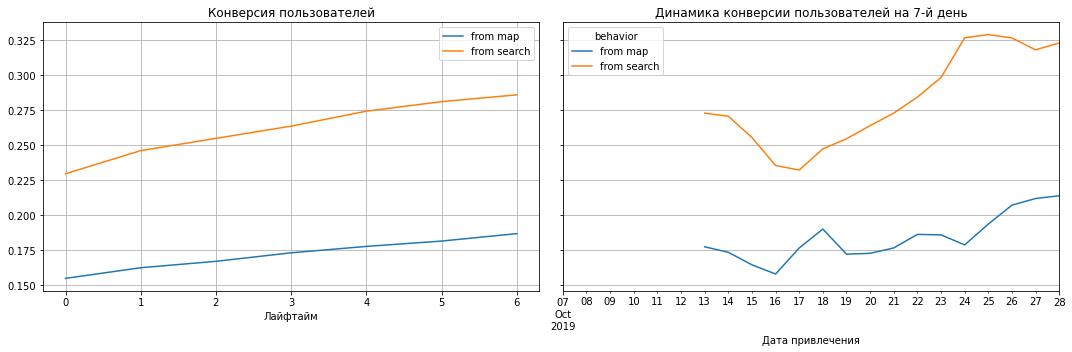

In [43]:
conversion_raw, conversion_grouped, conversion_in_time = get_conversion(
    profiles,
    events.query('event_name in ["contacts_show", "show_contacts"]'),
    observation_date,
    horizon_days=7,
    dimensions=['behavior'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_in_time, horizon=7, window=7)

И конверсия поиска значительно выше! Возможно он удобнее.

При этом надо помнить, что мы смогли определить поведение не всех пользователей: только 2-3к из 4 тысяч.

In [44]:
profiles['behavior'].value_counts()

from map       1456
from search    1233
Name: behavior, dtype: int64

### Вывод

Мы провели и проанализировали три сегментации:

    1) Более медленных и более быстрых пользователей: более медленные пользователи больше остаются в приложении и чаще совершают целевое действие;
    2) Пользователи пользующиеся приложением меньше 12 минут и больше: пользователи использующие приложение дольше и остаются в нем на дольше, и скорее совершат целевое действие;
    3) Пользователи приходящие разными путями: пользователи, приходящие из поиска показывают себя лучше.

## Статистический анализ

### Проверка гипотезы разных конверсий в зависимости от источника пользователя

Некоторые пользователи установили приложение по ссылке из yandex, другие — из google . Проверим гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов. Сформулируем 0 и альтернативную гипотезы:

    H0: конверсии групп yandex и google равны
    H1: конверсии групп yandex и google различаются

In [45]:
profiles = pd.merge(profiles, source, on='user_id', how='left')

In [46]:
result = st.ttest_ind(profiles.query('source == "yandex"')['called'],
                     profiles.query('source == "google"')['called'])
alpha = 0.05

print('p-value равна:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-value равна: 0.8245014043382632
Не получилось отвергнуть нулевую гипотезу


Гипотеза опроверглась: группы показывают достаточно близкую конверсию.

### Проверка гипотезы: пользователи чаще покупают предметы из "избранного" чем из рекомендаций

Проверим одностороннюю гипотезу:

    H0: конверсии групп, кликающих на рекомендации и добавляющих товары в избранное равны
    H1: конверсия группы, добавляющих товары в избранное выше чем конверсия кликающих на рекомендации

In [47]:
def fav_or_tip(events_session):

    if 'favorites_add' in events_session and not 'tips_click' in events_session:
        return 'favorites'
    elif 'tips_click' in events_session and not 'favorites_add' in events_session:
        return 'tips'
    elif 'tips_click' in events_session and 'favorites_add' in events_session:
        return 'fav_tip'


user_type = events.groupby(['user_id'])['event_name'].sum().reset_index()
user_type['fav_or_tip'] = user_type['event_name'].apply(fav_or_tip)

profiles = pd.merge(profiles, user_type[['user_id', 'fav_or_tip']], on='user_id', how='left')

In [48]:
profiles_fav = profiles.query('fav_or_tip == "favorites" or fav_or_tip == "fav_tip"')['called']
profiles_tip = profiles.query('fav_or_tip == "tips"  or fav_or_tip == "fav_tip"')['called']

result = st.ttest_ind(profiles_tip,
                     profiles_fav,
                    equal_var = True)
alpha = 0.05

if (result.pvalue / 2 < alpha) and (profiles_tip.mean() < profiles_fav.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

Отвергаем нулевую гипотезу


Гипотеза потдвердилась!

## Общий вывод

Мы провели анализ лога событий и сегментацию пользователей исходя из их поведения. Выводы сегментации:

    1) Более медленные пользователи больше остаются в приложении и чаще совершают целевое действие. Возможно это закономерно -- более быстрые пользователи могли быстро проверить приложение и уйти, не заинтересовавшись. 
    
    2) Пользователи использующие приложение больше по времени и остаются в нем на дольше, и скорее совершат целевое действие. Возможно нам стоит привлекать пользователей к большему использованию приложения: например могут помочь подборки или письма с новыми рекомендациями.
    
    3) Пользователи, приходящие из поиска показывают себя лучше. Стоит вспомнить, что они смотрят фотографии, в отличие от тех кто приходит из рекомендаций и карты. Может доступ к фото из других сегментов приложения не так удобен? Просмотр фото предложения очень важно для нашего типа бизнеса.
    
Так же мы проверили две гипотезы и выяснили:

    1) Конверсии групп yandex и google равны;
    
    2) Пользователи чаще покупают предметы из "избранного" чем из рекомендаций. Это уже не первый раз, когда в нашем иследовании рекомендации показали себя хуже альтернативы. Возможно они не совсем удобны в использовании или алгоритм рекомендаций плохо работает.

### Презентация

https://disk.yandex.ru/i/V0JccChr2YuJbw